In [20]:
#Import some basic libraries
import numpy as np
import pandas as pd

In [21]:
#Read the data present in dataset
data = pd.read_csv('kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [22]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [23]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

/var/folders/gn/kjw_zrmd1611jsl20dpvb3v40000gp/T/ipykernel_40297/2633093887.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
/var/folders/gn/kjw_zrmd1611jsl20dpvb3v40000gp/T/ipykernel_40297/2633093887.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [24]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [25]:
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [26]:
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

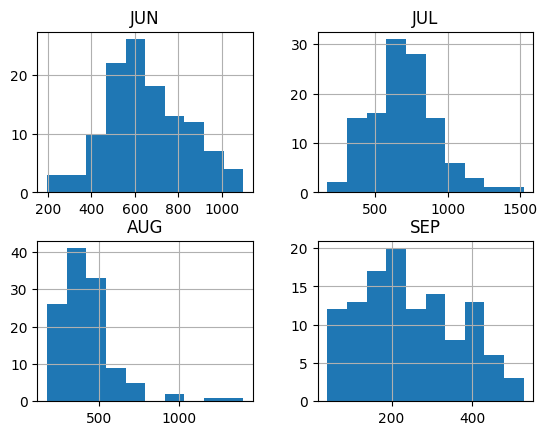

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [28]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [29]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
117,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1
17,1918,42.9,5.0,32.8,51.3,683.0,464.3,167.5,376.0,96.4,233.2,295.4,54.1
102,2003,0.7,50.9,82.1,134.4,91.0,566.7,532.0,350.3,93.6,407.0,76.4,9.7
57,1958,4.4,19.3,57.3,135.1,353.5,713.3,622.7,526.6,86.1,191.0,206.1,7.7
82,1983,0.2,1.5,0.9,13.1,76.0,322.8,583.2,579.9,421.1,136.2,116.5,69.1


In [31]:
y_train.head()


117    1
17     0
102    0
57     1
82     0
Name: FLOODS, dtype: int64

In [32]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [35]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [36]:
from sklearn.model_selection import cross_val_score
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [37]:
rmf_clf_acc

array([0.90625   , 0.70967742, 0.67741935])

In [38]:
y_pred = rmf_clf.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:87.500000
recall score:92.307692
roc score:87.062937


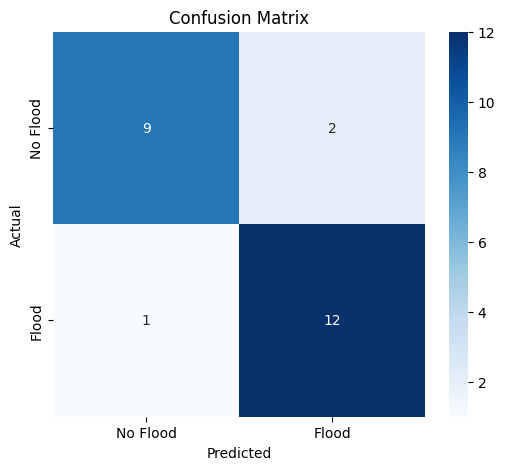

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

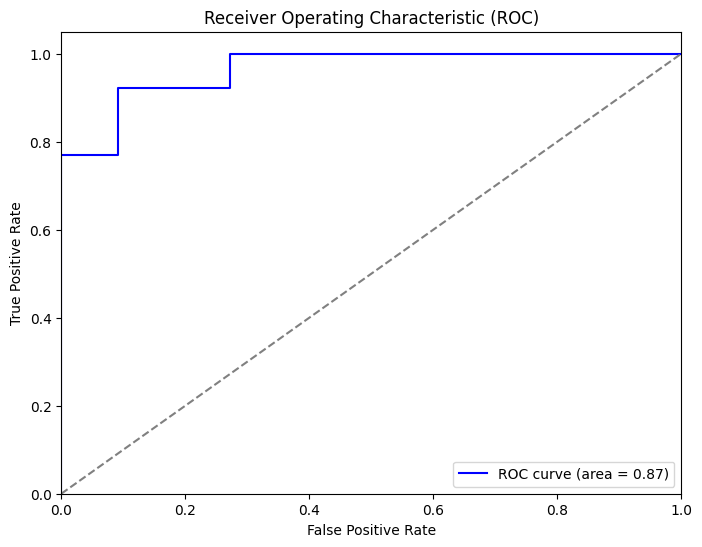

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rmf_clf.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


/var/folders/gn/kjw_zrmd1611jsl20dpvb3v40000gp/T/ipykernel_40297/4264942464.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x.columns, y=feature_importance, palette='viridis')


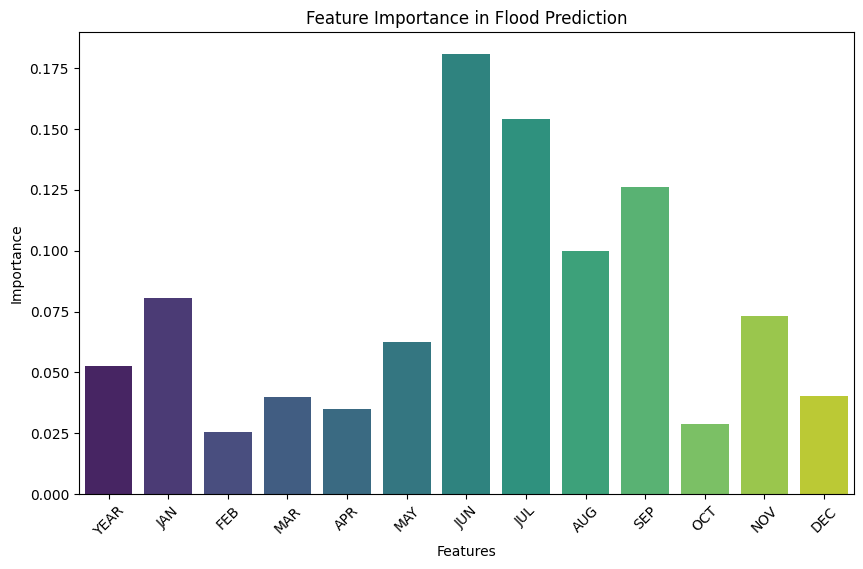

In [42]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
feature_importance = rmf_clf.feature_importances_
sns.barplot(x=x.columns, y=feature_importance, palette='viridis')
plt.title("Feature Importance in Flood Prediction")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tkinter import *

# Load dataset
data = pd.read_csv('kerala.csv')

# Preprocess dataset
data['FLOODS'].replace(['YES', 'NO'], [1, 0], inplace=True)

# Features and target
x = data.iloc[:, 1:14]  # Monthly rainfall and annual rainfall
y = data.iloc[:, -1]    # Flood occurrence (binary)

# Normalize data
minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = minmax.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf.fit(x_train, y_train)

# Tkinter GUI Application
def predict_flood():
    try:
        # Get user inputs
        jan = float(entry_jan.get())
        feb = float(entry_feb.get())
        mar = float(entry_mar.get())
        apr = float(entry_apr.get())
        may = float(entry_may.get())
        jun = float(entry_jun.get())
        jul = float(entry_jul.get())
        aug = float(entry_aug.get())
        sep = float(entry_sep.get())
        oct = float(entry_oct.get())
        nov = float(entry_nov.get())
        dec = float(entry_dec.get())
        annual_rainfall = float(entry_annual.get())

        # Normalize input data
        input_data = [[jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec, annual_rainfall]]
        input_data_scaled = minmax.transform(input_data)

        # Predict using the model
        prediction = rmf.predict(input_data_scaled)
        prob = rmf.predict_proba(input_data_scaled)[0]

        # Update result label
        if prediction[0] == 1:
            result_label.config(text=f"Flood Expected!\nConfidence: {prob[1]*100:.2f}%", fg="red")
        else:
            result_label.config(text=f"No Flood Expected.\nConfidence: {prob[0]*100:.2f}%", fg="green")
    except Exception as e:
        result_label.config(text=f"Error: {e}", fg="orange")

# Create GUI
root = Tk()
root.title("Flood Prediction")

# Labels and entries for rainfall inputs
Label(root, text="Enter Rainfall Data (in mm):").grid(row=0, column=0, columnspan=2, pady=10)

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL']
entries = []

for i, month in enumerate(months):
    Label(root, text=f"{month}:").grid(row=i+1, column=0, pady=5, sticky=W)
    entry = Entry(root, width=10)
    entry.grid(row=i+1, column=1, pady=5)
    entries.append(entry)

# Map entries to variables
entry_jan, entry_feb, entry_mar, entry_apr, entry_may, entry_jun, entry_jul, entry_aug, entry_sep, entry_oct, entry_nov, entry_dec, entry_annual = entries

# Predict button
Button(root, text="Predict Flood", command=predict_flood, bg="blue", fg="white").grid(row=len(months)+1, column=0, columnspan=2, pady=10)

# Result label
result_label = Label(root, text="", font=("Helvetica", 12))
result_label.grid(row=len(months)+2, column=0, columnspan=2, pady=10)

# Start GUI loop
root.mainloop()


/var/folders/gn/kjw_zrmd1611jsl20dpvb3v40000gp/T/ipykernel_41536/3336027003.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FLOODS'].replace(['YES', 'NO'], [1, 0], inplace=True)
/var/folders/gn/kjw_zrmd1611jsl20dpvb3v40000gp/T/ipykernel_41536/3336027003.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

: 